Grupo 0: Rodrigez Emilce y Rodriguez Paula

EDA

age------------------------Edad del cliente

job------------------------Tipo de empleo del cliente

martial status-------------Estado civil 

education------------------Educacion maxima alcanzada por el cliente

Credit---------------------Si tiene deuda de crédito o no

balance--------------------Promedio de saldo en la cuenta en el anio

housing loan---------------Si tiene seguro de hogar o no

Persona loan---------------Si tiene prestamos o no

contact--------------------tipo con contacto del cliente

Last Contact Day-----------Ultimo dia de contacto con el cliente en el mes

Last Contact Month---------Ultimo mes de contacto con el cliente en el anio

Last Contact Duration------Duracion del ultimo contacto con el cliente medido en segundos

campaign-------------------Cantidad de contactos al cliente durante esta campania, incluye el último contacto.

pdays----------------------Cantidad de dias que pasaron del último contacto con el cliente de una campania anterior.
                            -1 significa que no hubo contacto previo
                            
previous-------------------Cantidad de contactos previos a esta campania para cada cliente

poutcome-------------------Performance de la campania de marketing anterior para este cliente

Subscription---------------Si el cliente accede a la campania o no.



In [1]:
#Se importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Se importo el dataset con Pandas
df = pd.read_csv('bank_subscription.csv')
# Se muestra las primeras 5 filas del dataset
df.head()

,Unnamed: 0,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,0,58.0,management,married,NaN,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,1
1,1,44.0,technician,single,secondary,no,29.0,NaN,no,unknown,5,may,NaN,1,-1.0,0,unknown,1
2,2,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,1
3,3,47.0,blue-collar,married,unknown,no,NaN,yes,NaN,unknown,5,may,NaN,1,-1.0,0,unknown,1
4,4,NaN,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,-1.0,0,unknown,1


In [3]:
# Se muestra las dimensiones (filas, columnas)
df.shape

(45211, 18)

In [4]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             45211 non-null  int64  
 1   Age                    40238 non-null  float64
 2   Job                    40238 non-null  object 
 3   Marital Status         40238 non-null  object 
 4   Education              40238 non-null  object 
 5   Credit                 40238 non-null  object 
 6   Balance (euros)        40238 non-null  float64
 7   Housing Loan           37525 non-null  object 
 8   Personal Loan          37525 non-null  object 
 9   Contact                45211 non-null  object 
 10  Last Contact Day       45211 non-null  int64  
 11  Last Contact Month     45211 non-null  object 
 12  Last Contact Duration  37525 non-null  float64
 13  Campaign               45211 non-null  int64  
 14  Pdays                  37525 non-null  float64
 15  Pr

In [5]:
# Se renombran las siguiente columnas
df =df.rename(columns={'Marital Status':'Marital_Status',
                                   'Balance (euros)':'Balance(euros)',
                                   'Housing Loan':'Housing_Loan',
                                   'Personal Loan':'Personal_Loan',
                                    'Last Contact Day':'Last_Contact_Day',
                                   'Last Contact Month':'Last_Contact_Month',
                                   'Last Contact Duration':'Last_Contact_Duration'})

In [6]:
#cuantos nans por muestra
df.isnull().sum()

Unnamed: 0                  0
Age                      4973
Job                      4973
Marital_Status           4973
Education                4973
Credit                   4973
Balance(euros)           4973
Housing_Loan             7686
Personal_Loan            7686
Contact                     0
Last_Contact_Day            0
Last_Contact_Month          0
Last_Contact_Duration    7686
Campaign                    0
Pdays                    7686
Previous                    0
Poutcome                    0
Subscription                0
dtype: int64

In [7]:
#Se eliminan muestras con 4 o mas Nans
dfnew = df[df.isnull().sum(axis=1) <4]

In [8]:
# Se borra la columna no desea y se guada en el mismo dataset
dfnew= dfnew.iloc[:,1:]
#Verifico
dfnew.head()

,Age,Job,Marital_Status,Education,Credit,Balance(euros),Housing_Loan,Personal_Loan,Contact,Last_Contact_Day,Last_Contact_Month,Last_Contact_Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,management,married,NaN,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,1
1,44.0,technician,single,secondary,no,29.0,NaN,no,unknown,5,may,NaN,1,-1.0,0,unknown,1
2,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,1
3,47.0,blue-collar,married,unknown,no,NaN,yes,NaN,unknown,5,may,NaN,1,-1.0,0,unknown,1
4,NaN,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,-1.0,0,unknown,1


In [9]:
#Verifico
dfnew.shape

(43650, 17)

In [10]:
#Se saca la media de las variables numericas y se completan los Nans
num_col = dfnew.select_dtypes(include = np.number)
dfnew=dfnew.fillna(num_col.mean(axis=0))

In [11]:
#Reemplazamos los nan de las variables categoricas por la moda 
dfnew['Job'].fillna(dfnew['Job'].mode()[0], inplace=True)
dfnew['Education'].fillna(dfnew['Education'].mode()[0], inplace=True)
dfnew['Credit'].fillna(dfnew['Credit'].mode()[0], inplace=True)
dfnew['Marital_Status'].fillna(dfnew['Marital_Status'].mode()[0], inplace=True)
dfnew['Housing_Loan'].fillna(dfnew['Housing_Loan'].mode()[0], inplace=True)
dfnew['Personal_Loan'].fillna(dfnew['Personal_Loan'].mode()[0], inplace=True)

In [12]:
#Chequeamos nuevamente los NAns
dfnew.isnull().sum()

Age                      0
Job                      0
Marital_Status           0
Education                0
Credit                   0
Balance(euros)           0
Housing_Loan             0
Personal_Loan            0
Contact                  0
Last_Contact_Day         0
Last_Contact_Month       0
Last_Contact_Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Poutcome                 0
Subscription             0
dtype: int64

In [13]:
#Se guarda el dataset en un archivo .csv
dfnew.to_csv('bank_subscription_filtrado.csv')

In [14]:
#Primero defininmos los limites de la categoria Age y creamos una nueva columna
dfnew.loc[(dfnew['Age'] > 0) & (dfnew['Age'] <= 20), 'Rango de edad [Años]'] = 'Menos de 20'
dfnew.loc[(dfnew['Age'] > 20) & (dfnew['Age'] <= 40), 'Rango de edad [Años]']   = 'de 20 a 40'
dfnew.loc[(dfnew['Age'] > 40) & (dfnew['Age'] <= 60), 'Rango de edad [Años]']   = 'de 40 a 60'
dfnew.loc[(dfnew['Age'] > 60) & (dfnew['Age'] <= 80), 'Rango de edad [Años]']   = 'de 60 a 80'
dfnew.loc[(dfnew['Age'] > 80) , 'Rango de edad [Años]']   = 'Mas de 80'


In [15]:
#Para facilitar el analisis filtro por los que accedieron la campaña
sub=dfnew.loc[dfnew['Subscription']==2]
nsub=dfnew.loc[dfnew['Subscription']==1]

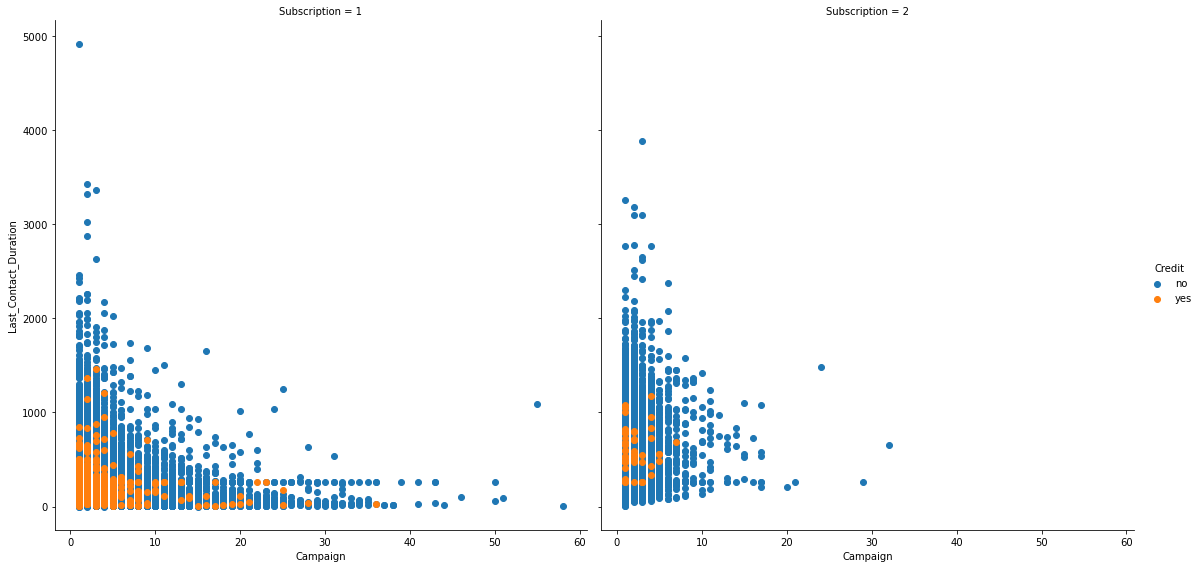

In [16]:
# Vemos como se distribuye segun si tiene credito o no
sns.FacetGrid(dfnew, col='Subscription',hue="Credit",height=8,aspect=1) \
   .map(plt.scatter, "Campaign", "Last_Contact_Duration") \
   .add_legend()

Text(0.5, 1.0, 'Boxplot sobre la duracion del contacto de los que se subcribieron')

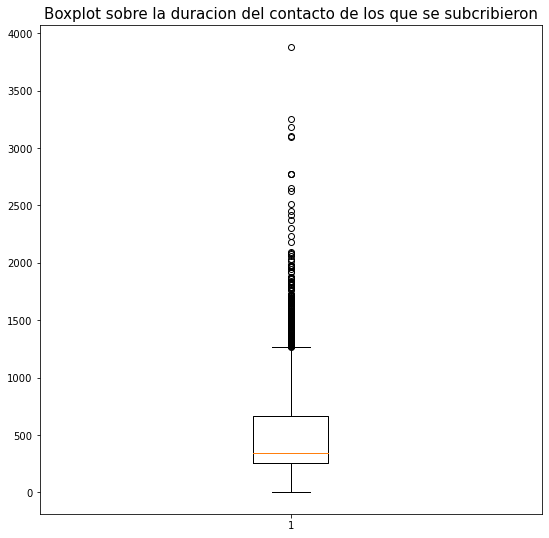

In [17]:
#Determinamos el tamaño del gráfico 
plt.figure(figsize = (9,9))
#Llamamos a la función y vemos la distribucion de la duracion del ultimo contacto en los clientes que se suscribieron
an = plt.boxplot(x='Last_Contact_Duration',data=sub)
#Nombramos nuestro gráfico
plt.title("Boxplot sobre la duracion del contacto de los que se subcribieron",size=15)

In [18]:
# Obtenemos la mediana,minimo y maximo, Q1 - Q3, whiskers y Outliers
medians = an["medians"][0].get_ydata()
low_limits =an["whiskers"][0].get_ydata()
up_limits = an["whiskers"][1].get_ydata()
Q1 =  low_limits[0]
Q3 =  up_limits[0]
low_whiskers =  low_limits[1]
up_whiskers = up_limits[1]
outliers = an["fliers"][0].get_ydata()

print(f'Valor Mediana:\r\n {medians[0]}\r\n')
print(f'[Q1 - Q3] : [{Q1} - {Q3}]\r\n')
print(f'[Minimo  - Maximo]: [{low_whiskers} - {up_whiskers}] \r\n')
print(f'Valores outliers:\r\n{outliers}\r\n')

Valor Mediana:
 343.0

[Q1 - Q3] : [257.7651108994421 - 662.0]

[Minimo  - Maximo]: [8.0 - 1268.0] 

Valores outliers:
[1467. 1623. 1677. 1297. 1597. 1574. 1689. 2087. 1692. 2016. 1346. 2231.
 1721. 1553. 1328. 1423. 1867. 1622. 1334. 1777. 1410. 1681. 1697. 1349.
 1392. 1560. 1272. 1446. 3094. 1560. 1730. 1363. 1269. 1500. 1980. 1363.
 1449. 1446. 1865. 2653. 3881. 1290. 1323. 2769. 1345. 2621. 1528. 1540.
 2093. 1574. 1467. 1573. 1663. 1617. 1422. 1409. 3183. 1576. 1272. 1767.
 1486. 1290. 1439. 1341. 2029. 1499. 1399. 1973. 1649. 1310. 1397. 1669.
 1336. 1806. 1656. 1275. 1584. 1448. 1319. 1303. 1360. 1373. 1877. 1342.
 1360. 1352. 1545. 1833. 1508. 2078. 1309. 1359. 1417. 1484. 1441. 1491.
 1602. 1492. 1422. 1946. 1330. 1369. 2516. 1461. 1486. 1488. 1536. 1311.
 1357. 1456. 1321. 1282. 1344. 1307. 1344. 1613. 1842. 1314. 1579. 1871.
 1576. 1293. 1503. 1532. 1877. 1642. 2372. 3253. 1789. 1303. 1978. 1855.
 1437. 1554. 1502. 1792. 1468. 1720. 1503. 1490. 1341. 2420. 1598. 2453.
 1571

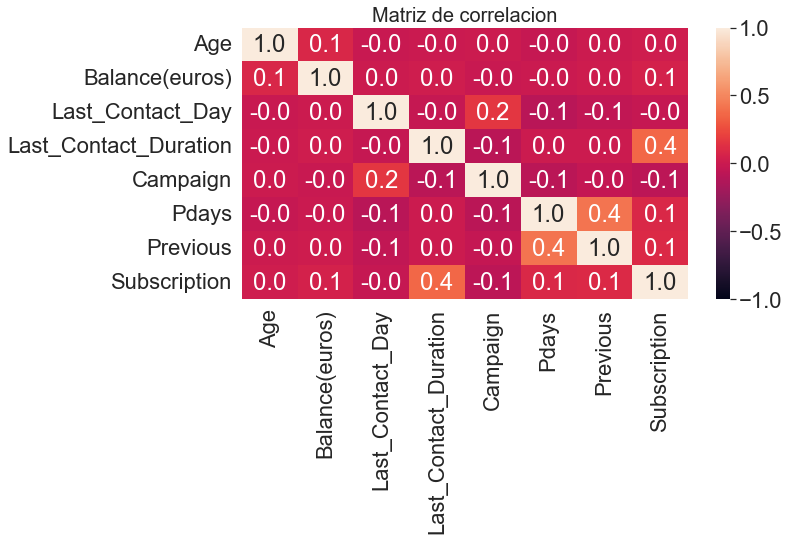

In [19]:
# Se configura el tamaño del grafico
plt.figure(figsize = (10,5))
# Se llama a la funcion de heatmap y se le pasa por argumento las correlaciones del dataset, se indica que inicie en -1
# y que aparezcan dentro del grafico los valores de la correlacion entre variable 
sns.set(font_scale = 2)
sns.heatmap(dfnew.corr(),annot= True, vmin=-1,fmt='.1f')
plt.title("Matriz de correlacion",size = 20)
plt.show()

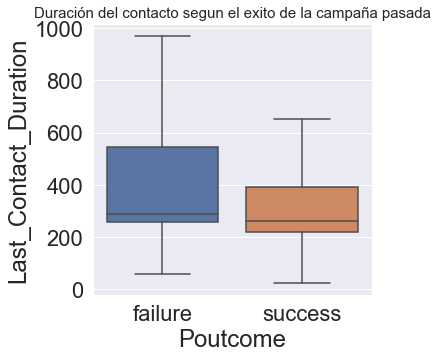

In [76]:
#Para facilitar el analisis filtro según el resultado de la campaña anterior
df2=sub.loc[(sub['Poutcome'] =='success') | (sub['Poutcome']=='failure')]
#Determinamos el tamaño del gráfico
plt.figure(figsize = (5,5))
#Llamamos a la función y diferenciamos por poutcome
an = sns.boxplot(y='Last_Contact_Duration',x='Poutcome',data=df2,showfliers=False)
#Nombramos nuestro gráfico
plt.title("Duración del contacto segun el exito de la campaña pasada",size=15)
#Mostramos nuestro gráfico
plt.show()

In [31]:
#Para facilitar el analisis filtro según el resultado de la campaña anterior
dfsub1=sub.loc[(sub['Credit'] =='yes') & (sub['Personal_Loan']=='yes')]
rows1 = len(dfsub1.axes[0])
dfsub2=sub.loc[(sub['Credit'] =='no') & (sub['Personal_Loan']=='yes')]
rows2 = len(dfsub2.axes[0])
dfsub3=sub.loc[(sub['Credit'] =='yes') & (sub['Personal_Loan']=='no')]
rows3 = len(dfsub3.axes[0])
dfsub4=sub.loc[(sub['Credit'] =='no') & (sub['Personal_Loan']=='no')]
rows4 = len(dfsub4.axes[0])
print(f'Clientes que que estan suscritos y ...\r\n')
print(f' tienen un credito y un prestamo:\t {rows1}\r\n')
print(f' tienen un prestamo:\t {rows2 }\r\n')
print(f' tienen un credito:\t{rows3 }\r\n')
print(f' no tienen ni un credito ni un prestamo:\t {rows3 }\r\n')

Clientes que que estan suscritos y ...

 tienen un credito y un prestamo:	 11

 tienen un prestamo:	 377

 tienen un credito:	36

 no tienen ni un credito ni un prestamo:	 36



<Figure size 576x576 with 0 Axes>

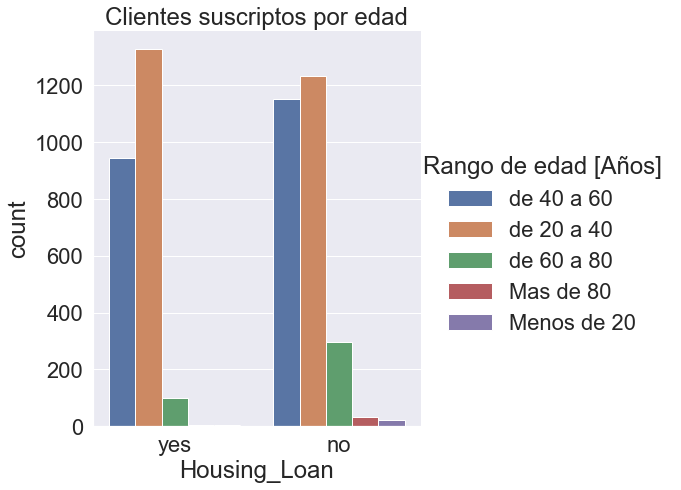

<Figure size 2160x2160 with 0 Axes>

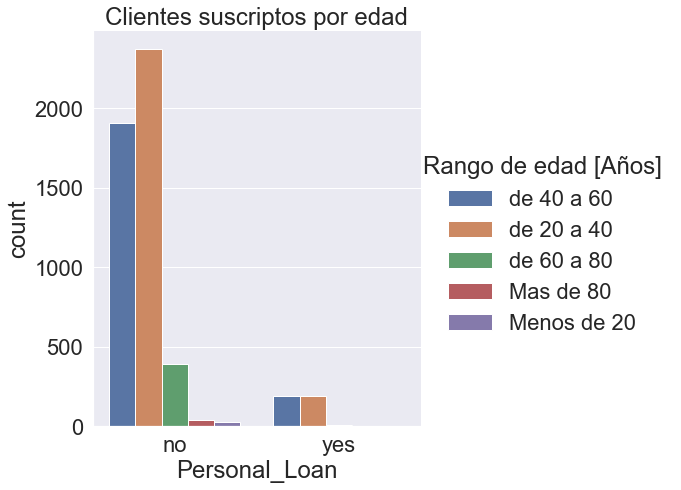

<Figure size 1008x720 with 0 Axes>

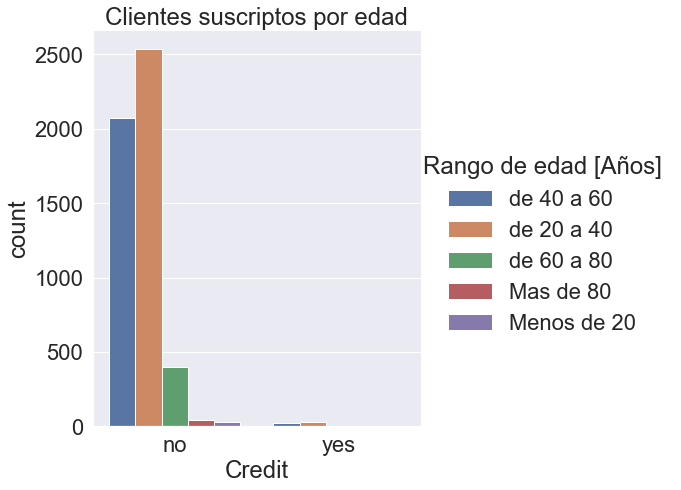

In [32]:
#Determinamos el tamaño del gráfico
plt.figure(figsize = (8,8))
#Llamamos a la función y diferenciamos dentro de cada rango por edad
an = sns.catplot(x="Housing_Loan",hue='Rango de edad [Años]',kind = "count", data=sub,height=7)
#Nombramos nuestro gráfico
plt.title("Clientes suscriptos por edad")
#Mostramos nuestro gráfico
plt.show()

#Determinamos el tamaño del gráfico
plt.figure(figsize = (30,30))
an = sns.catplot(x="Personal_Loan",hue='Rango de edad [Años]',kind = "count", data=sub,height=7)
plt.title("Clientes suscriptos por edad")
plt.show()

plt.figure(figsize = (14,10))
an = sns.catplot(x="Credit",hue='Rango de edad [Años]',kind = "count", data=sub,height=7)
plt.title("Clientes suscriptos por edad")
plt.show()

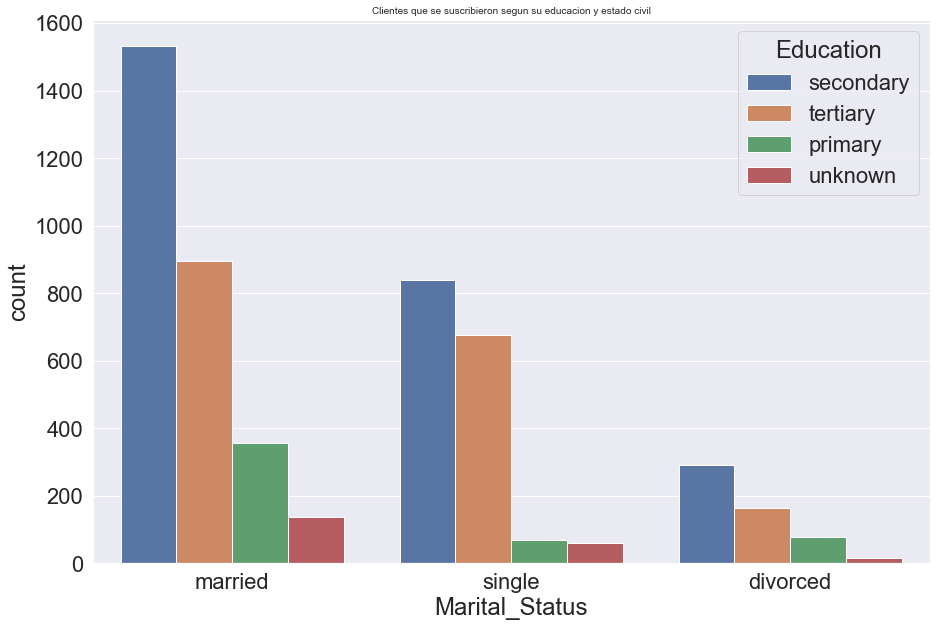

In [35]:
#Determinamos el tamaño del gráfico
plt.figure(figsize = (15,10))
#Se grafica el estado civil de los clientes suscribtos segmentados por su educacion
ak = sns.countplot(x ='Marital_Status', data = sub,hue='Education')
#Nombramos al gráfico
plt.title("Clientes que se suscribieron segun su educacion y estado civil",size=10)
#Mostramos el gráfico
plt.show()

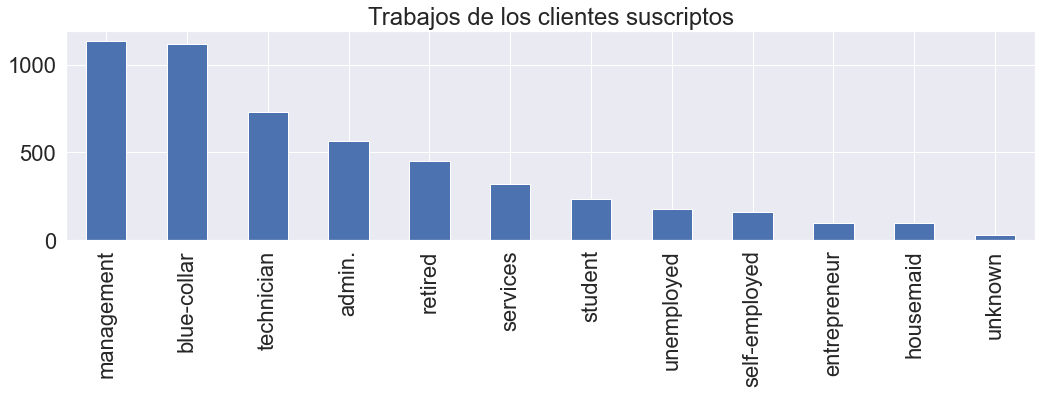

In [74]:
#Graficamos la distribion de los trabajos de los clientes suscriptos  
plt.figure(figsize=(15,6))

sub['Job'].value_counts().plot(kind='bar')
plt.title('Trabajos de los clientes suscriptos')
plt.tight_layout()

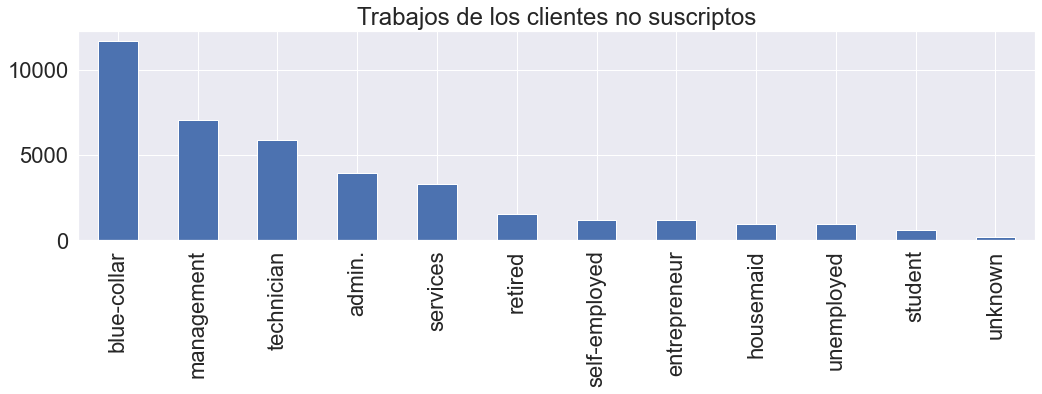

In [73]:
#Graficamos la distribion de los trabajos de los clientes no suscriptos 
plt.figure(figsize=(15,6))
nsub['Job'].value_counts().plot(kind='bar')
plt.title('Trabajos de los clientes no suscriptos')
plt.tight_layout()

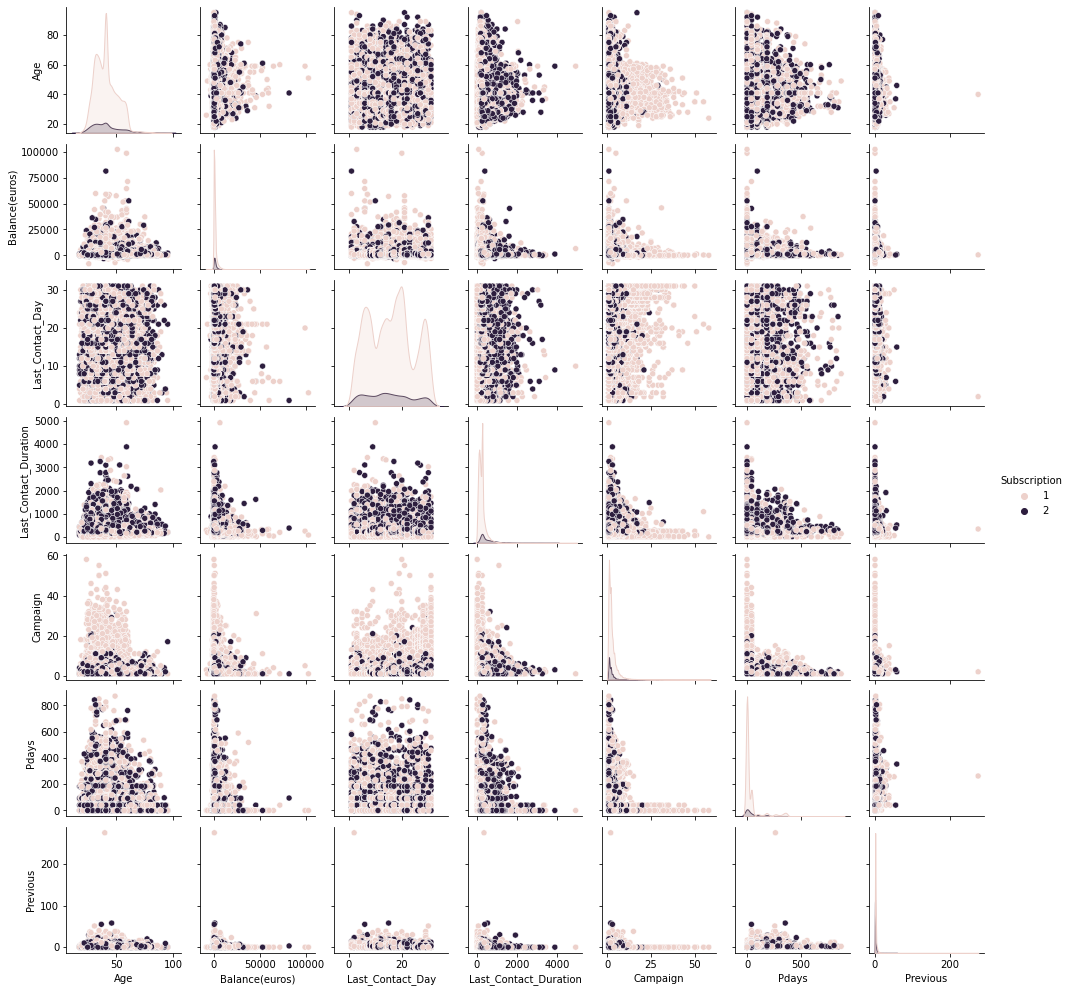

In [23]:
#Llamamos a la funcion pairplot por suscripcion
sns.pairplot(data=dfnew,hue='Subscription',height=2)
#Mostramos la graficaAge
plt.show()